# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [91]:
from datetime import datetime

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [123]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
query_url = f"{url}appid={api_key}&units={units}&q="
city_name = []
i = 0
j = 1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    if i < 50:
        try:
            name = response['name']
            print(f"Processing Record {i} of Set {j} | {name}")
            city_name.append(name)
            i = i+1
        except (KeyError, IndexError):
            print("City not found. Skipping...") 
        
    else:

        try:
            name = response['name']
            i = 0
            j = j+1
            print(f"Processing Record {i} of Set {j} | {name}")
            city_name.append(name)
            i = 1
        except (KeyError, IndexError):
            print("City not found. Skipping...") 
    time.sleep(1)
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Processing Record 0 of Set 1 | Carnarvon
Processing Record 1 of Set 1 | Hermanus
Processing Record 2 of Set 1 | Barrow
City not found. Skipping...
Processing Record 3 of Set 1 | Hithadhoo
Processing Record 4 of Set 1 | Busselton
City not found. Skipping...
Processing Record 5 of Set 1 | Bambous Virieux
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Lufilufi
City not found. Skipping...
Processing Record 8 of Set 1 | Nongpoh
Processing Record 9 of Set 1 | Puerto Ayora
Processing Record 10 of Set 1 | Gualeguaychu
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | Albany
Processing Record 12 of Set 1 | Qaanaaq
Processing Record 13 of Set 1 | Atuona
Processing Record 14 of Set 1 | Naze
Processing Record 15 of Set 1 | San Quintin
Processing Record 16 of Set 1 | Vangaindrano
Processing Record 17 of Set 1 | Leningradskiy
Processing Record 18 of Set 1 | Upernavik
Processing Record 19 of Set 1 | Nikolayevsk-na-amure
Processing Record 20

Processing Record 36 of Set 4 | Zyryanka
Processing Record 37 of Set 4 | Hobyo
Processing Record 38 of Set 4 | Cururupu
Processing Record 39 of Set 4 | Walvis Bay
Processing Record 40 of Set 4 | Norman Wells
City not found. Skipping...
Processing Record 41 of Set 4 | Sistranda
Processing Record 42 of Set 4 | Luena
Processing Record 43 of Set 4 | Sulangan
Processing Record 44 of Set 4 | Abu Samrah
Processing Record 45 of Set 4 | Adrar
Processing Record 46 of Set 4 | Lata
Processing Record 47 of Set 4 | Katherine
Processing Record 48 of Set 4 | Wanaka
Processing Record 49 of Set 4 | Tuatapere
City not found. Skipping...
Processing Record 0 of Set 5 | Saldanha
Processing Record 1 of Set 5 | Haines Junction
Processing Record 2 of Set 5 | Talara
City not found. Skipping...
Processing Record 3 of Set 5 | Cayenne
Processing Record 4 of Set 5 | San Cristobal
Processing Record 5 of Set 5 | Nabire
Processing Record 6 of Set 5 | Lavrentiya
Processing Record 7 of Set 5 | Brigantine
Processing Reco

Processing Record 21 of Set 8 | Sibolga
Processing Record 22 of Set 8 | Shahrud
Processing Record 23 of Set 8 | Fortuna
Processing Record 24 of Set 8 | Havoysund
Processing Record 25 of Set 8 | Fukagawa
Processing Record 26 of Set 8 | Nanakuli
Processing Record 27 of Set 8 | Tual
Processing Record 28 of Set 8 | Pahrump
Processing Record 29 of Set 8 | Leh
Processing Record 30 of Set 8 | Nome
Processing Record 31 of Set 8 | Banjar
Processing Record 32 of Set 8 | Kantang
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 33 of Set 8 | Khorixas
Processing Record 34 of Set 8 | Namibe
City not found. Skipping...
Processing Record 35 of Set 8 | Impfondo
Processing Record 36 of Set 8 | Togur
Processing Record 37 of Set 8 | Sorong
Processing Record 38 of Set 8 | Kharan
Processing Record 39 of Set 8 | Anicuns
Processing Record 40 of Set 8 | Chumikan
Processing Record 41 of Set 8 | Romhany
Processing Record 42 of Set 8 | Vraca
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [124]:
weather = pd.DataFrame()
weather['City'] = city_name
weather['Cloudiness'] = ''
weather['Country'] = ''
weather['Date'] = ''
weather['Humidity'] = ''
weather['Lat'] = ''
weather['Lng'] = ''
weather['Max Temp'] = ''
weather['Wind Speed'] = ''

cloudlist = []
countrylist = []
datelist = []
humidlist = []
latlist = []
lnglist = []
max_templist = []
windlist = []


In [125]:
for index,row in weather.iterrows():
    city = row['City']
    response = requests.get(query_url + city).json()
    cloud = response['clouds']['all']
    cloudlist.append(cloud)
    country = response['sys']['country']
    countrylist.append(country)
    date = response['dt']
    datelist.append(date)
    humid = response['main']['humidity']
    humidlist.append(humid)
    lat = response['coord']['lat']
    latlist.append(lat)
    lng = response['coord']['lon']
    lnglist.append(lng)
    max_temp = response['main']['temp_max']
    max_templist.append(max_temp)
    wind = response['wind']['speed']
    windlist.append(wind)
    time.sleep(1)
weather['Cloudiness'] = cloudlist
weather['Country'] = countrylist
weather['Date'] = datelist
weather['Humidity'] = humidlist
weather['Lat'] = latlist
weather['Lng'] = lnglist
weather['Max Temp'] = max_templist
weather['Wind Speed'] = windlist

In [126]:
weather.to_csv('weather.csv')
weather.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [127]:
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,ZA,1548097342,10,-30.97,22.13,80.82,10.45
1,Hermanus,0,ZA,1548097348,50,-34.42,19.24,66.60,2.95
2,Barrow,0,AR,1548097349,38,-38.31,-60.23,83.34,10.45
3,Hithadhoo,44,MV,1548097350,100,-0.60,73.08,82.44,4.52
4,Busselton,76,AU,1548097361,100,-33.64,115.35,65.29,18.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

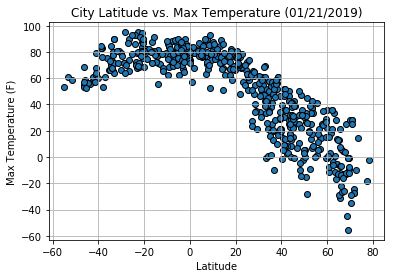

In [128]:
date1 = datetime.fromtimestamp(weather['Date'][0])
date1 = date1.strftime('%m/%d/%Y')
plt.scatter(weather['Lat'],weather['Max Temp'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Max Temperature (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

#### Latitude vs. Humidity Plot

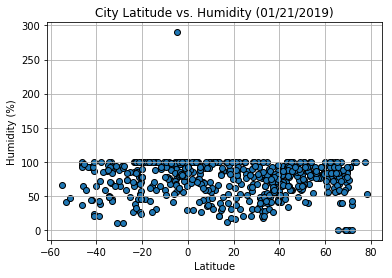

In [130]:
plt.scatter(weather['Lat'],weather['Humidity'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Humidity (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [134]:
weather.loc[weather['Humidity']>100,:]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
202,Talara,0,PE,1548093600,290,-4.58,-81.27,62.6,10.29


#### Latitude vs. Cloudiness Plot

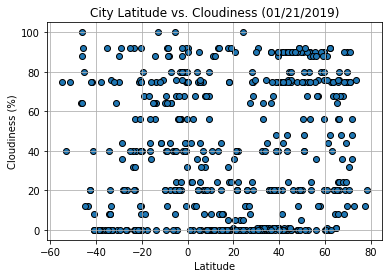

In [131]:
plt.scatter(weather['Lat'],weather['Cloudiness'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Cloudiness (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#### Latitude vs. Wind Speed Plot

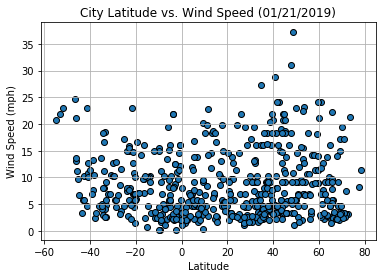

In [132]:
plt.scatter(weather['Lat'],weather['Wind Speed'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Wind Speed (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Analysis

The southern hemisphere is warmer on average than the northern hemisphere, which makes sense because it is summer in the southern hemisphere.

Most humidity percentages are between 50 and 100 percent. There is one data point that has 290 percent humidity. This is an error in the data, as that city has humidity of 57 percent, currently.

The majority of wind speeds are between 0 and 10 mph. Four of the top five highest wind speeds occur in the northern hemisphere.